# Shortest Path of the Union of Domains (SPUD) Demonstration

This demonstrates how to use the SPUD class. Note, not everything discussed in the paper will be shown here. 

### Necessary dependencies for SPUD:
- scipy
- graphtools
- numpy
- matplotlib.pyplot
- igraph
- sklearn

### Additional dependicies for SPUD:
- time
- seaborn

In [1]:
from SPUD_and_MASH import SPUD

#We will require pandas for this demonstration
import pandas as pd
import numpy as np
from demonstration_helper import *

#Include a random state
rs = {"random_state" : 42}

## Iris Data set

In [16]:
#Prepare the dataset
iris_features, iris_labels = prepare_dataset("csv_files/iris.csv")

#Create domains
iris_domainA, iris_domainB = split_features(iris_features, split = "distort") #NOTE: Try changing split to "random" or "rotation"

#Create anchors. Use only 10 anchors. 
iris_anchors = create_anchors(int(len(iris_features)))[:10] #NOTE: Try changing the 10 to any amount of anchors

# Initialize SPUD
iris_spud = SPUD(knn = 8, verbose = 3, **rs)

#Fit SPUD
iris_spud.fit(dataA = iris_domainA, dataB = iris_domainB, known_anchors=iris_anchors)

<><><><><><><><><><><><><>  Processed Finished  <><><><><><><><><><><><><>


/yunity/arusty/Graph-Manifold-Alignment/.venv/lib/python3.10/site-packages/graphtools/graphs.py:283: RuntimeWarning: Detected zero distance between samples 9 and 34, 9 and 37, 34 and 37, 101 and 142. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


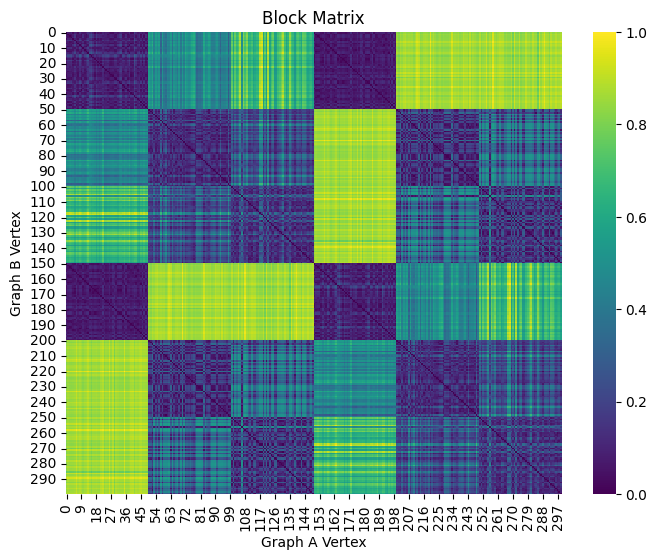

In [3]:
#Plot heat map
iris_spud.plot_heat_map() #The top left block represents domain A, and the bottom right is domain b. The off-diagonals represent interdomain distances.

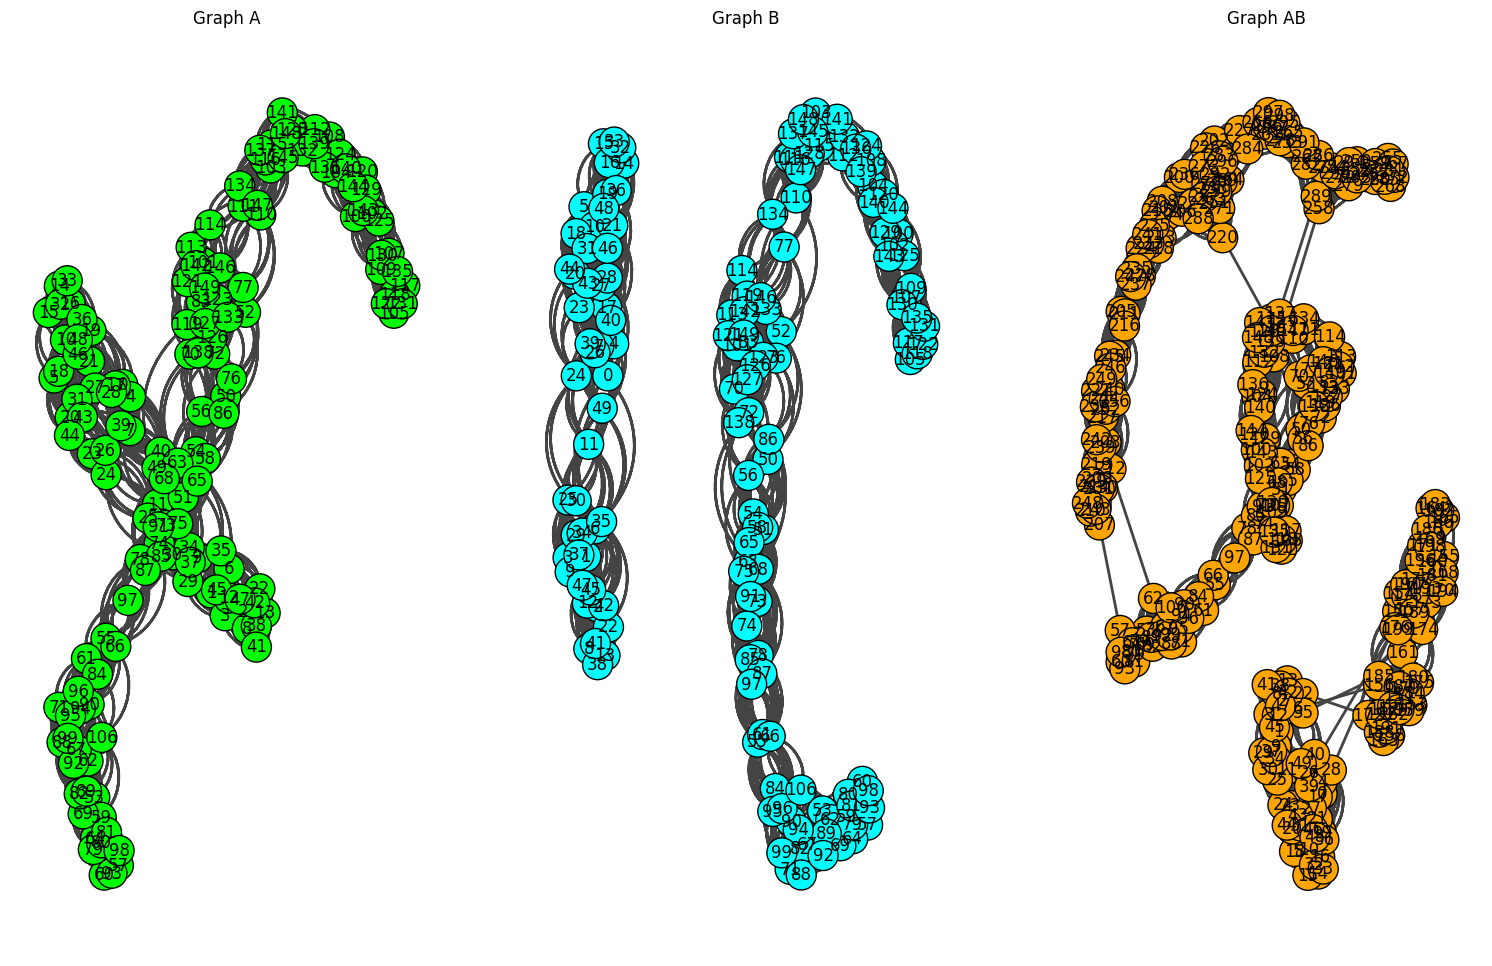

In [4]:
#Plot Graphs
iris_spud.plot_graphs() #This function takes the most time, so in the future, we will not plot it. 

Cross Embedding score: 0.96
Fraction of Samples Closest to thier Match: 0.0006222222222222223


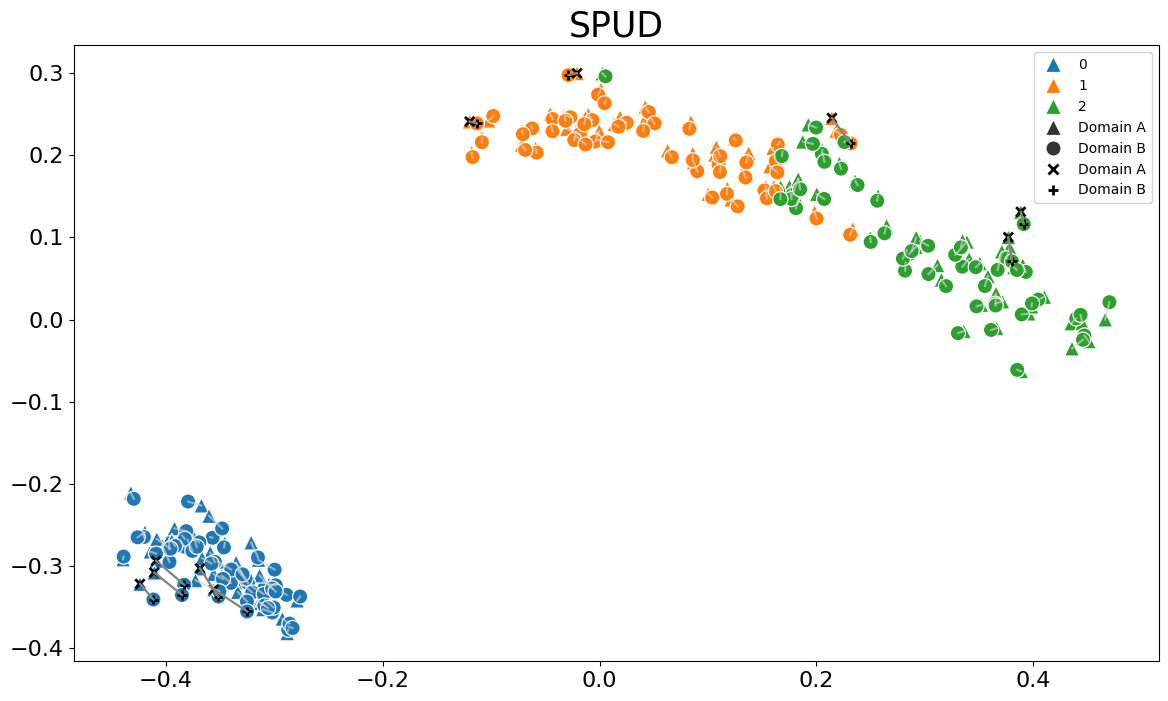

In [5]:
#Plot Embedding
iris_spud.plot_emb(labels = iris_labels) #Try playing with the hyperparameters to change how the plot shows. 

## Seeds Dataset

In [17]:
#Prepare the dataset
seeds_features, seeds_labels = prepare_dataset("csv_files/seeds.csv")

#Create domains
seeds_domainA, seeds_domainB = split_features(seeds_features, split = "rotation") #NOTE: Try changing split to "random" or "rotation"

#Create anchors. Use only 10 anchors. 
seeds_anchors = create_anchors(int(len(seeds_features)))[:10] #NOTE: Try changing the 10 to any amount of anchors

# Initialize SPUD
seeds_spud = SPUD(knn = 8, verbose = 3, **rs)

#Fit SPUD
seeds_spud.fit(dataA = seeds_domainA, dataB = seeds_domainB, known_anchors=seeds_anchors)

<><><><><><><><><><><><><>  Processed Finished  <><><><><><><><><><><><><>


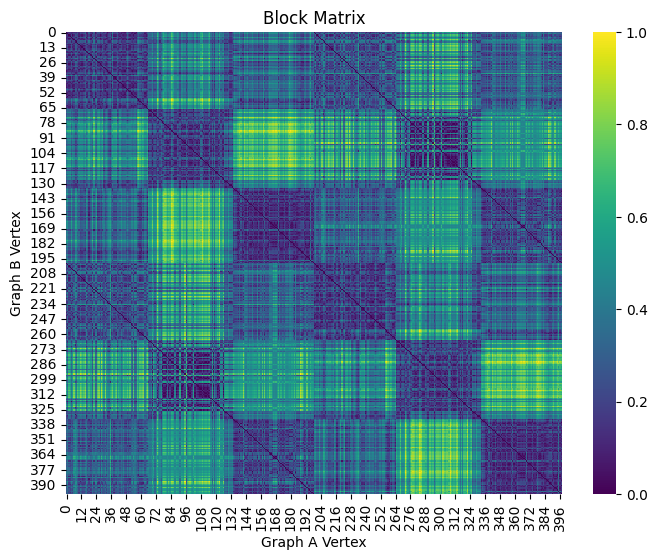

In [7]:
seeds_spud.plot_heat_map()

Cross Embedding score: 0.9120603015075377
Fraction of Samples Closest to thier Match: 0.000151511325471579


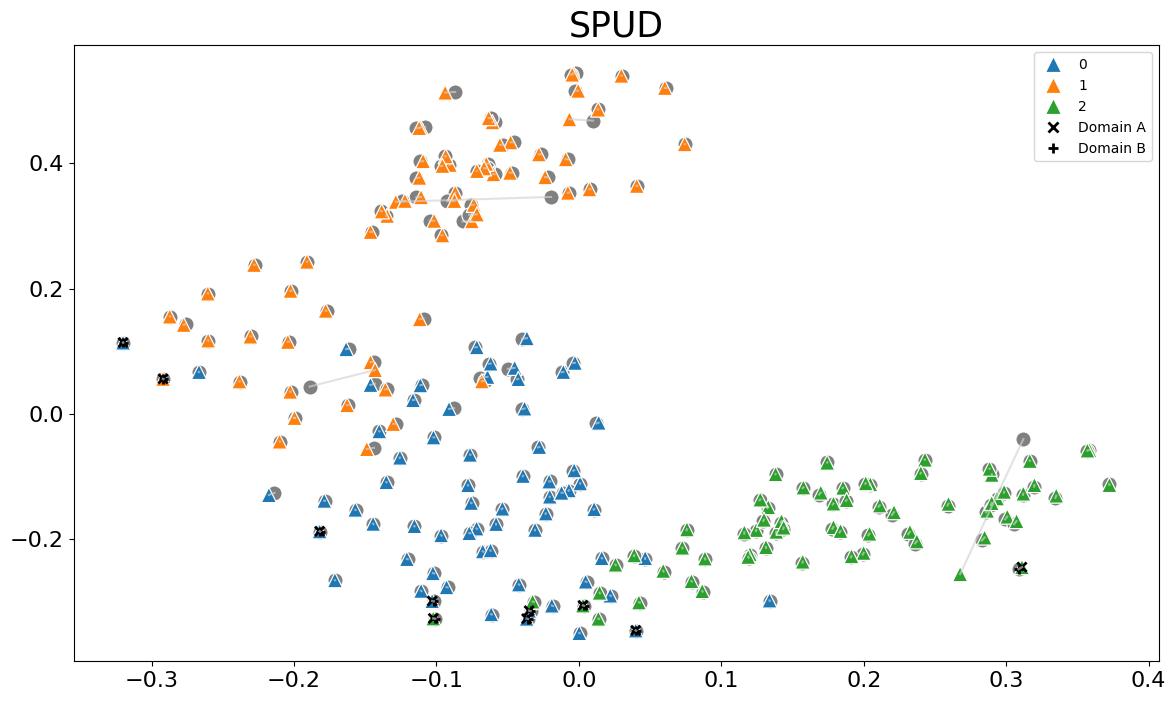

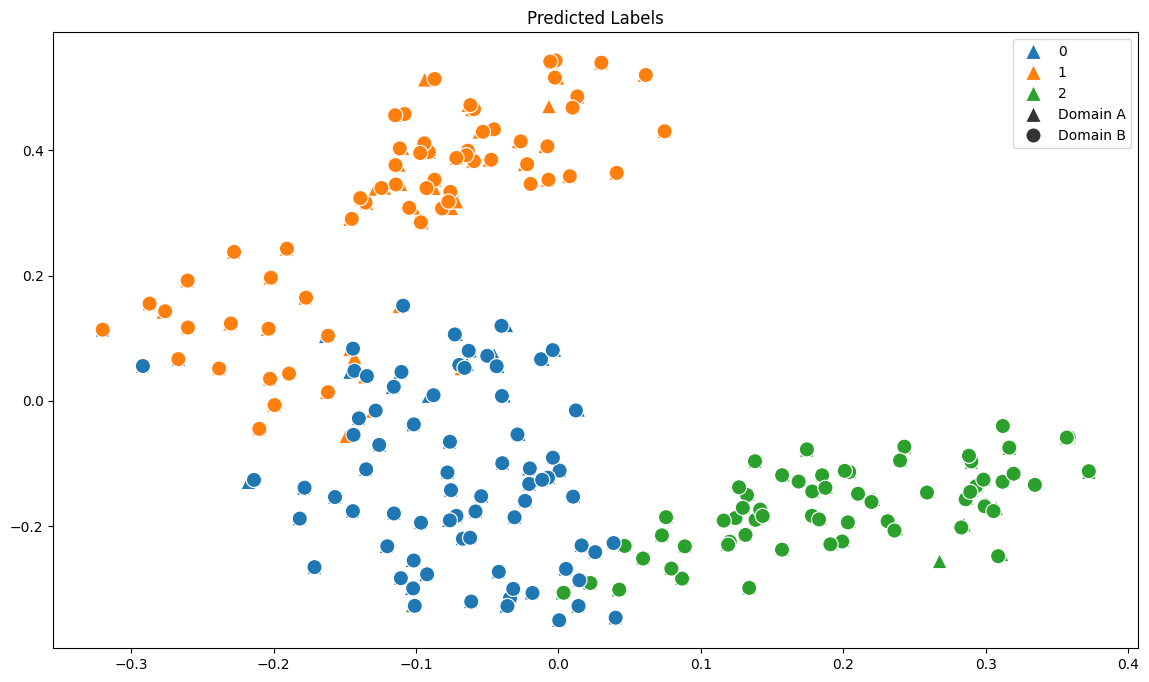

In [8]:
seeds_spud.plot_emb(labels = seeds_labels, show_pred=True)

## Breast Cancer Dataset

In [15]:
#Prepare the dataset
cancer_features, cancer_labels = prepare_dataset("csv_files/breast_cancer.csv")

#Create domains
cancer_domainA, cancer_domainB = split_features(cancer_features, split = "random") #NOTE: Try changing split to "random" or "rotation"

#Create anchors. Use only 10 anchors. 
cancer_anchors = create_anchors(int(len(cancer_features)))[:10] #NOTE: Try changing the 10 to any amount of anchors

# Initialize SPUD
cancer_spud = SPUD(knn = 12, agg_method="log", verbose = 4, **rs)

#Fit SPUD
cancer_spud.fit(dataA = cancer_domainA, dataB = cancer_domainB, known_anchors=cancer_anchors)

Time it took to compute SGDM:  0.04


/yunity/arusty/Graph-Manifold-Alignment/.venv/lib/python3.10/site-packages/graphtools/graphs.py:122: UserWarning: Building a kNNGraph on data of shape (699, 699) is expensive. Consider setting n_pca.
  warnings.warn(
/yunity/arusty/Graph-Manifold-Alignment/.venv/lib/python3.10/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 3229 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/yunity/arusty/Graph-Manifold-Alignment/.venv/lib/python3.10/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/yunity/arusty/Graph-Manifold-Alignment/.venv/lib/python3.10/site-packages/graphtools/graphs.py:122: UserWarning: Building a kNNGraph on data of shape (699, 699) is expensive. Consider setting n_pca.
  warnings.warn(
/yunity/arusty/Graph-Manifold-Alignment/.venv/lib/python3.10/site-packages/graphtools/gra

Time it took to execute graphtools.Graph functions:  0.42
Time it took to execute merge_graphs function:  0.0
Time it took to execute get_block function:  0.37
<><><><><><><><><><><><><>  Processed Finished  <><><><><><><><><><><><><>


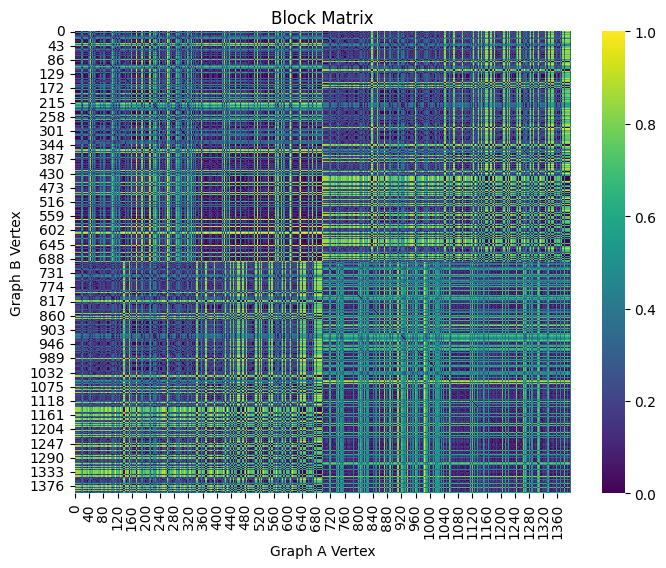

In [10]:
cancer_spud.plot_heat_map()

Time it took to calculate the embedding: 18.25
Cross Embedding score: 0.7875536480686696
Fraction of Samples Closest to thier Match: 0.04636502995286542


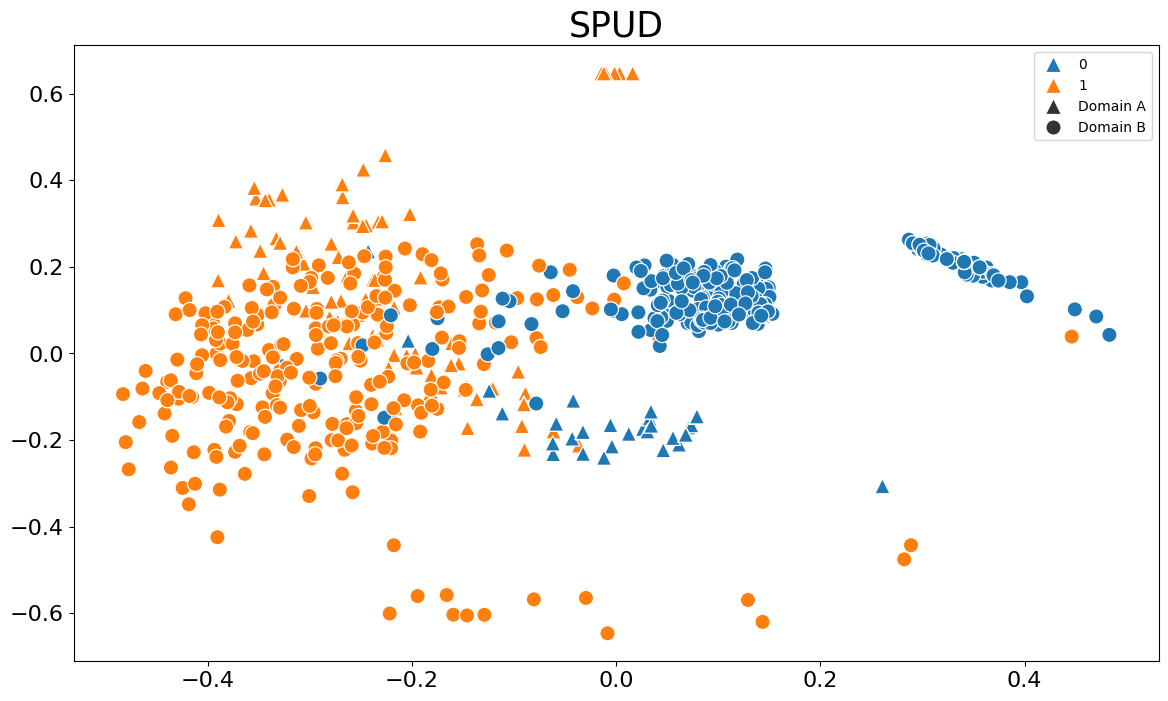

Time it took complete the plots: 0.22


In [11]:
cancer_spud.plot_emb(labels = cancer_labels, show_anchors=False, show_lines=False)

## Glass Dataset

In [18]:
#Prepare the dataset
glass_features, glass_labels = prepare_dataset("csv_files/glass.csv")

#Create domains
glass_domainA, glass_domainB = split_features(glass_features, split = "distort") #NOTE: Try changing split to "random" or "rotation"

#Create anchors. Use only 10 anchors. 
glass_anchors = create_anchors(int(len(glass_features)))[:10] #NOTE: Try changing the 10 to any amount of anchors

# Initialize SPUD
glass_spud = SPUD(knn = 35, OD_method = "mean", agg_method="log", overide_method="NAMA", verbose = 4, **rs)

#Fit SPUD
glass_spud.fit(dataA = glass_domainA, dataB = glass_domainB, known_anchors=glass_anchors)

Time it took to compute SGDM:  0.01
Skipping graph creating. Performing nearest anchor manifold alignment (NAMA) instead of SPUD.
Preforming mean calculations.

Time it took to execute get_block function:  0.01
<><><><><><><><><><><><><>  Processed Finished  <><><><><><><><><><><><><>


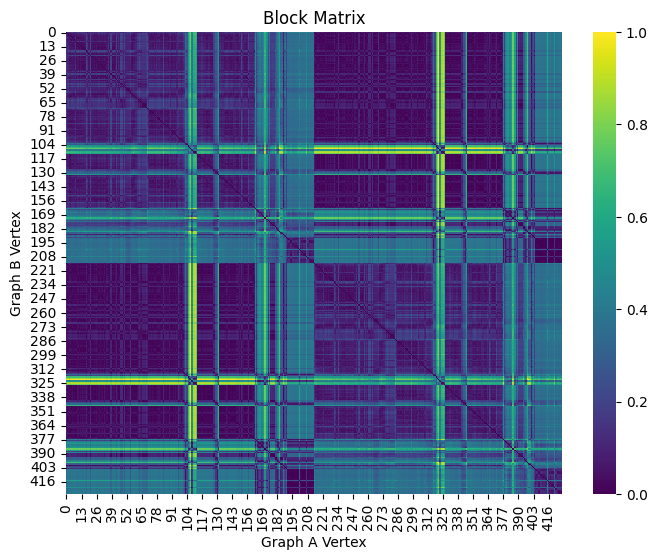

In [13]:
glass_spud.plot_heat_map()

Time it took to calculate the embedding: 1.33
Cross Embedding score: 0.7289719626168225
Fraction of Samples Closest to thier Match: 2.183596820683029e-05


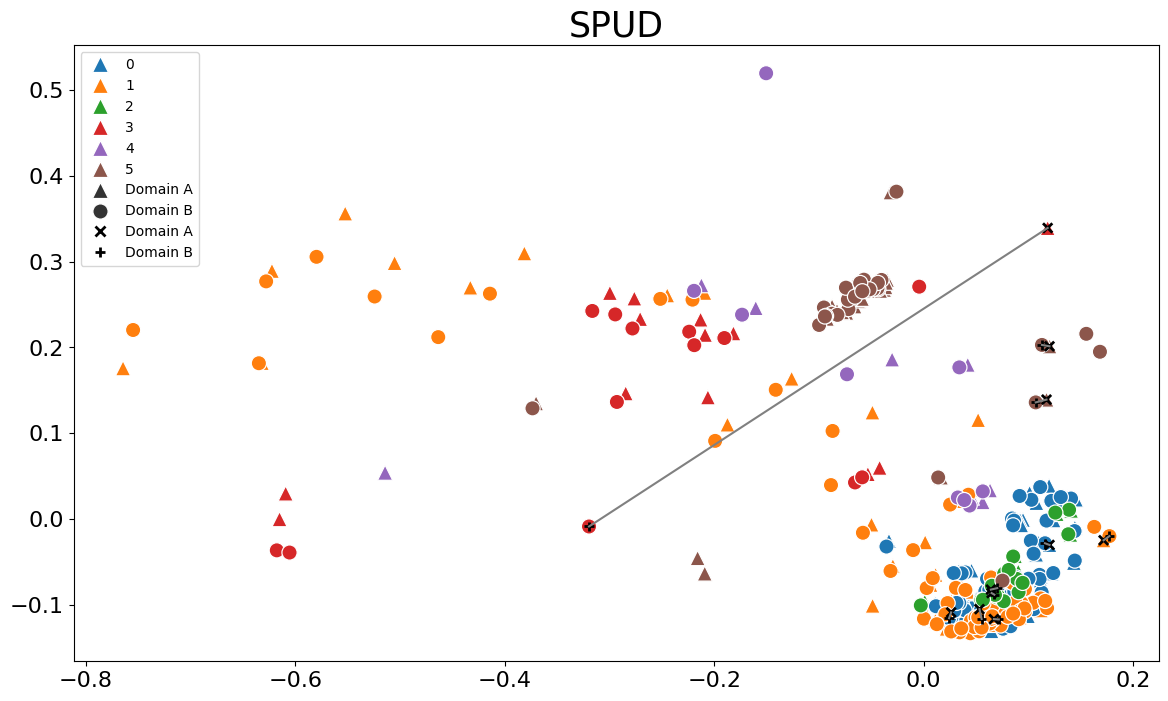

Time it took complete the plots: 0.26


In [14]:
glass_spud.plot_emb(glass_labels, show_lines=False)